In [124]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

mpl.rcParams['axes.unicode_minus'] = False

total_list = pd.read_csv('total_list3.csv')
boxoffice = pd.read_csv('boxoffice3.csv') 
genre_total = pd.read_csv('genre_total2.csv',  thousands = ',')   #천단위 숫자기호 제거

In [87]:
import matplotlib.font_manager as fm

#1. 폰트 리스트 확인
# font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
# font_list[:]

#2. 리스트 중, 기존 글꼴 가져오기

import matplotlib
fm.findSystemFonts(fontpaths=None, fontext='ttf')
plt.rc('font', family='gulim')

# # 혹은 폰트 경로를 직접 전달해줘도 동작합니다.
# # 다만 사용가능한 폰트 목록과 확장자명 확인이 필요합니다.
font_location = 'C:\\Windows\\Fonts\\gulim.ttc' # for windows

font_nm = fm.FontProperties(fname=font_location).get_name() # 폰트명 가져와서 변수에 저장
matplotlib.rc('font', family=font_nm)

# 마이너스 글꼴 깨짐 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [101]:
genre_total.drop('Unnamed: 0', axis=1, inplace = True)

In [102]:
# 연, 월 object로 변환 
genre_total['month'] = genre_total['month'].astype(object)
genre_total['year'] = genre_total['year'].astype(object)
genre_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         966 non-null    object 
 1   genre         966 non-null    object 
 2   number_movie  966 non-null    int64  
 3   t_use         966 non-null    int64  
 4   share         966 non-null    float64
 5   year          966 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 45.4+ KB


In [167]:
genre_total

,Unnamed: 0,month,genre,number_movie,t_use,share,year
0,0,9,액션,2106,1487260,24.8,2018
1,1,9,드라마,3774,970147,16.2,2018
2,2,9,애니메이션,1047,750333,12.5,2018
3,3,9,판타지,166,595012,9.9,2018
4,4,9,멜로/로맨스,2165,416129,6.9,2018
...,...,...,...,...,...,...,...
961,961,4,다큐멘터리,494,27336,0.6,2020
962,962,4,기타,546,25376,0.6,2020
963,963,4,뮤지컬,44,6695,0.2,2020
964,964,4,서부극(웨스턴),52,2970,0.1,2020


In [104]:
# 2018년도

yearly_2018 = genre_total[genre_total['year']==2018]    # 전체 데이터에서 2018년도
yearly_2018_group = yearly_2018.groupby(['genre']).sum()   # 장르별 합계 
yearly_2018 = yearly_2018_group.sort_values(by ='t_use',ascending=False )  # 총 이용건수 내림차순 정렬 
yearly_2018_top5 = yearly_2018.head(5)   #top5 만 보기
yearly_2018_top5   ## 장르별, 총 이용건수의 상위 5개 
yearly_2018_top5  = yearly_2018_top5.reset_index()
yearly_2018_top5

,genre,number_movie,t_use,share
0,액션,17849,15676804,205.7
1,드라마,32042,8920380,127.9
2,애니메이션,8813,7389688,95.1
3,범죄,3954,5811285,73.8
4,멜로/로맨스,19365,3901655,53.9


In [112]:
# #2019년도

yearly_2019_top5 = genre_total[genre_total['year'] ==2019].groupby(['genre']).sum().sort_values(by = 't_use',ascending=False).head(5)
yearly_2019_top5 = yearly_2019_top5.reset_index()
yearly_2019_top5

#2020년도
yearly_2020_top5 = genre_total[genre_total['year'] ==2020].groupby(['genre']).sum().sort_values(by = 't_use',ascending=False).head(5).reset_index()
yearly_2020_top5
#2021년도
yearly_2021_top5 = genre_total[genre_total['year'] ==2021].groupby(['genre']).sum().sort_values(by = 't_use',ascending=False).head(5).reset_index()
yearly_2021_top5

#2022년도
yearly_2022_top5 = genre_total[genre_total['year'] ==2022].groupby(['genre']).sum().sort_values(by = 't_use',ascending=False).head(5).reset_index()
yearly_2022_top5

,genre,number_movie,t_use,share
0,액션,7764,1818286,81.0
1,애니메이션,3564,1179820,51.8
2,범죄,1521,1172873,51.9
3,드라마,13256,802636,36.5
4,멜로/로맨스,10460,456763,21.3


# 파이차트 그릴때 주의점! 
## 파이차트의 값을 리스트로 변환해서 넣어야함!


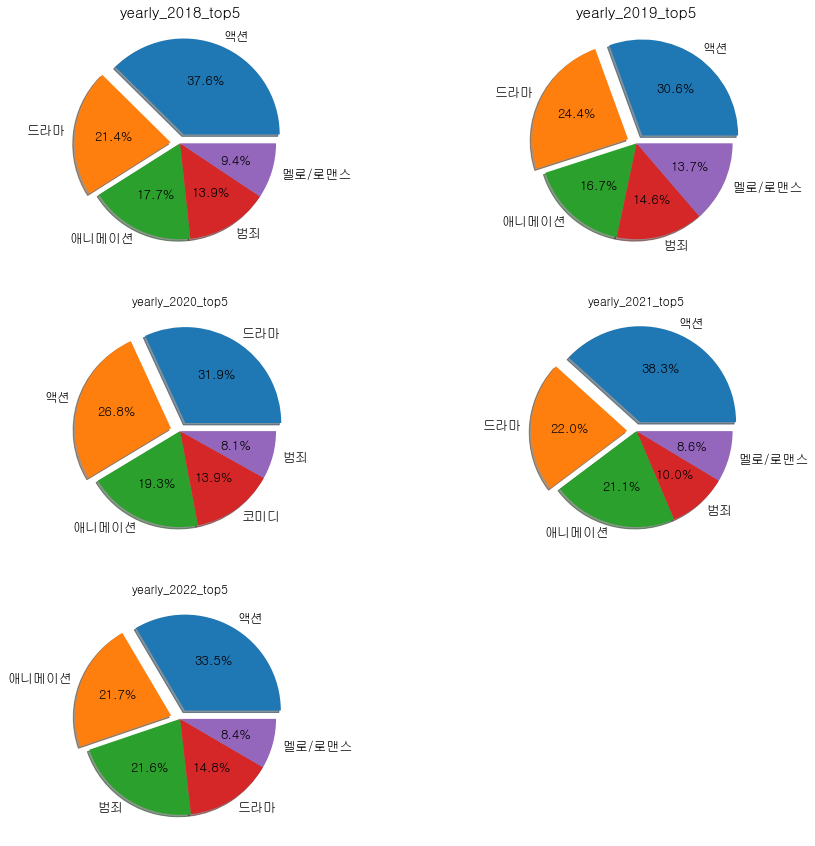

In [116]:
fig = plt.figure(figsize = (15,15)) 

######################
number = yearly_2018_top5['t_use']
labels = yearly_2018_top5['genre']

ax1 = plt.subplot(3,2,1)  # 행, 열, 위치

ax1.pie(number,   # 파이 값
        labels = labels,   # 레이블 명 리스트로 주기 
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=[0.1, 0.1, 0, 0, 0],    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13}  )   # 폰트 사이즈

ax1.set_title('yearly_2018_top5', size =15)

######################
ax2 = plt.subplot(3,2,2)  # 행, 열, 위치

number2 = yearly_2019_top5['t_use']
labels2 = yearly_2019_top5['genre']

ax2.pie(number2,   # 파이 값
        labels = labels,   # 레이블 명 리스트로 주기 
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=[0.1, 0.1, 0, 0, 0],    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13}  )   # 폰트 사이즈

ax2.set_title('yearly_2019_top5', size = 15)



##############
number3 = yearly_2020_top5['t_use']
labels3 = yearly_2020_top5['genre']

ax3 = plt.subplot(3,2,3)

ax3.pie( number3, 
        labels = labels3,
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=[0.1, 0.1, 0, 0, 0],    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13}  )   # 폰트 사이즈
              

ax3.set_title('yearly_2020_top5')




########
number4 = yearly_2021_top5['t_use']
labels4 = yearly_2021_top5['genre']


ax4 = plt.subplot(3,2,4)

ax4.pie( number4, 
        labels = labels4,
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=[0.1, 0.1, 0, 0, 0],    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13}  )   # 폰트 사이즈


ax4.set_title('yearly_2021_top5')



############
number5 = yearly_2022_top5['t_use']
labels5 = yearly_2022_top5['genre']


ax5 = plt.subplot(3,2,5)

ax5.pie( number5, 
        labels = labels5,
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=[0.1, 0.1, 0, 0, 0],    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13}  )   # 폰트 사이즈
              
ax5.set_title('yearly_2022_top5')






plt.show()



In [117]:
genre_total

,month,genre,number_movie,t_use,share,year
0,9,액션,2106,1487260,24.8,2018
1,9,드라마,3774,970147,16.2,2018
2,9,애니메이션,1047,750333,12.5,2018
3,9,판타지,166,595012,9.9,2018
4,9,멜로/로맨스,2165,416129,6.9,2018
...,...,...,...,...,...,...
961,4,다큐멘터리,494,27336,0.6,2020
962,4,기타,546,25376,0.6,2020
963,4,뮤지컬,44,6695,0.2,2020
964,4,서부극(웨스턴),52,2970,0.1,2020


C:\Users\wjd98\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

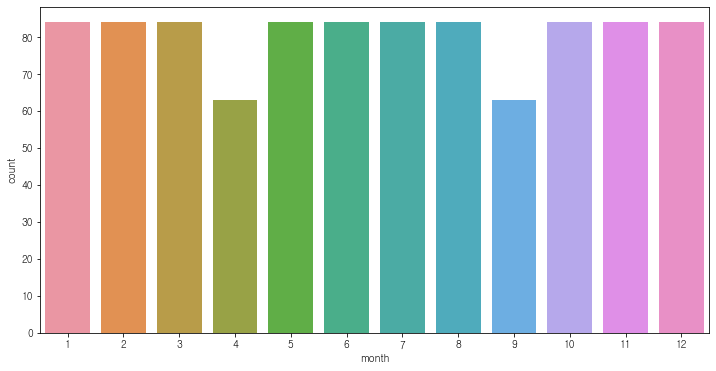

In [123]:
fig, ax = plt.subplots(1,1, figsize = (12,6))
ax = sns.countplot(genre_total['month'])
plt.show

In [127]:
total_list[total_list['seat_qty'] == 0]

,new,year,month,region,title,open_date,sales,sales_share,cum_sales,audience,cum_audience,screen_qty,screen_count,re_nation,nation,seat_rate,seat_share,seat_qty
3014,20187광주시유니콘 원정대: 비밀의 다이어리,2018,7,광주시,유니콘 원정대: 비밀의 다이어리,2018-06-21,260000,0.0,3077100,49,408,1,1,인도,인도,0.0,0.0,0.0
14642,20192광주시극장판 공룡메카드: 타이니소어의 섬,2019,2,광주시,극장판 공룡메카드: 타이니소어의 섬,2019-01-10,266000,0.0,97921950,50,12812,1,2,한국,한국,0.0,0.0,0.0
14819,201812광주시캡틴 샤키,2018,12,광주시,캡틴 샤키,2018-11-22,183000,0.0,1384000,35,214,1,1,독일,독일,0.0,0.0,0.0
26278,20198광주시극장판 샤이닝스타:새로운 루나퀸의 탄생!,2019,8,광주시,극장판 샤이닝스타:새로운 루나퀸의 탄생!,2019-07-18,126000,0.0,3844300,24,490,1,1,한국,한국,0.0,0.0,0.0


In [128]:
total_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105291 entries, 0 to 105290
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   new           105290 non-null  object 
 1   year          105291 non-null  int64  
 2   month         105291 non-null  int64  
 3   region        105291 non-null  object 
 4   title         105290 non-null  object 
 5   open_date     92790 non-null   object 
 6   sales         105291 non-null  int64  
 7   sales_share   105290 non-null  float64
 8   cum_sales     105291 non-null  int64  
 9   audience      105291 non-null  int64  
 10  cum_audience  105291 non-null  int64  
 11  screen_qty    105291 non-null  int64  
 12  screen_count  105291 non-null  int64  
 13  re_nation     105010 non-null  object 
 14  nation        105010 non-null  object 
 15  seat_rate     92478 non-null   float64
 16  seat_share    92478 non-null   float64
 17  seat_qty      92478 non-null   float64
dtypes: f

In [166]:
df = pd.pivot_table(
    total_list,
    values = 'seat_qty',
    index = ['year','month'],
             
    columns = 'region',
    aggfunc = sum
)
df

region            강원도         경기도       경상남도       경상북도         광주시  \
year month                                                            
2018 4      2709506.0  19479037.0  4676830.0  3487001.0   3380472.0   
     5      2712278.0  19240574.0  4678655.0  3423122.0   3354713.0   
     6      2681935.0  19311134.0  4622392.0  3242675.0   3344357.0   
     7      2879492.0  20461457.0  4911542.0  3537550.0   3512339.0   
     8      2908954.0  21161330.0  5102887.0  3610028.0   3564594.0   
     9      2407151.0  17879715.0  4140075.0  2977980.0   2974057.0   
     10     2823955.0  21277644.0  4409976.0  3428504.0   3581174.0   
     11     2726861.0  19800885.0  4118560.0  3244088.0   3363532.0   
     12     2931496.0  21482893.0  4624717.0  3514074.0   3754238.0   
2019 1      2862717.0  21781748.0  4721418.0  3582716.0   3595556.0   
     2      2641225.0  20662595.0  4448805.0  3391624.0   3196082.0   
     3      1698829.0  13779138.0  3024754.0  2324922.0   2198535.0   
     4      2230776.0  18966001.0  4277811.0  2971247.0   2965966.0   
     5      2522224.0  19762527.0  4546348.0  3270357.0   3259554.0   
     6      2664167.0  20579823.0  4697311.0  3331085.0   3374667.0   
     7      2853403.0  22117121.0  4946635.0  3524735.0   3635750.0   
     8      2979453.0  23542032.0  5286498.0  3778613.0   3832992.0   
     9      2053502.0  16625422.0  3626549.0  2628825.0   2634339.0   
     10     2689060.0  21882657.0  4857747.0  3470101.0         0.0   
     11     2655529.0  22073639.0  4791497.0  3473396.0         0.0   
     12     2785712.0  22893775.0  4935258.0  3618485.0         0.0   
2020 1      2815613.0  22680949.0  5063539.0  3633395.0         0.0   
     2      2300464.0  18854742.0  4173785.0  2780752.0         0.0   
     3       787179.0   9406471.0  1813685.0   616114.0         0.0   
     4       307552.0   4710138.0   775202.0   309808.0         0.0   
     5       704148.0   9194916.0  1951040.0   903190.0         0.0   
     6      1166901.0  13319210.0  2817241.0  1695200.0         0.0   
     7      1515943.0  17130573.0  3546479.0  2457809.0         0.0   
     8      1844485.0  19444354.0  4036481.0  2939381.0         0.0   
     9       874945.0   9082040.0  2036424.0  1346704.0   1429873.0   
     10     1593776.0  15844609.0  3428473.0  2084904.0   2425661.0   
     11     1374342.0  14236240.0  3037185.0  1788814.0   2185563.0   
     12      786740.0   9340923.0  2027348.0  1096711.0   1485751.0   
2021 1       749672.0   8706845.0  1779030.0   794924.0   1346749.0   
     2      1120848.0  12003971.0  2644794.0  1404822.0   1752150.0   
     3       879991.0   9636986.0  1886781.0  1199124.0   1557282.0   
     4      1204016.0  13046395.0  2681220.0  1533406.0   1857272.0   
     5      1347069.0  14550208.0  2951418.0  1795195.0   2019447.0   
     6      1475682.0  15836854.0  3224846.0  2003871.0   2258267.0   
     7      1922711.0  16400874.0  3890977.0  2560537.0   2646163.0   
     8      2077644.0  17378867.0  3901287.0  2945393.0   2977440.0   
     9      1234497.0  10812527.0  2641173.0  1886632.0   1889745.0   
     10     1688495.0  15868589.0  3526245.0  2425298.0   2539080.0   
     11     1703989.0  17590035.0  3590990.0  2393255.0   2508720.0   
     12     1619122.0  16314054.0  3344123.0  2237125.0   2354675.0   
2022 1      1737970.0  17115456.0  3485652.0  2438957.0   2303669.0   
     2      1429231.0  14310118.0  2828437.0  1860893.0   1944189.0   
     3      1004225.0   9811971.0  1939110.0  1284987.0   1470033.0   
     4      1372420.0  14432058.0  2931569.0  1875429.0  10327015.0   
     5      2079478.0  20163145.0  4022745.0  2769121.0   2856584.0   
     6      2100372.0  19385113.0  3976228.0  2660876.0   2803134.0   
     7            0.0         0.0        0.0        0.0         0.0   

region             대구시         대전시         부산시         서울시        세종시  \
year month                                                              
2018 4       441803

In [139]:
genre_total[(genre_total['year']== 2022 ) ]

,Unnamed: 0,month,genre,number_movie,t_use,share,year
483,483,1,액션,2739,736423,29.1,2022
484,484,1,애니메이션,1229,466282,18.4,2022
485,485,1,범죄,551,386315,15.3,2022
486,486,1,드라마,4750,261060,10.3,2022
487,487,1,멜로/로맨스,3674,140234,5.6,2022
...,...,...,...,...,...,...,...
541,541,3,가족,109,10531,0.6,2022
542,542,3,사극,103,9369,0.5,2022
543,543,3,서부극(웨스턴),33,2576,0.1,2022
544,544,3,뮤지컬,43,1737,0.1,2022


In [154]:
boxoffice

boxoffice[(boxoffice['year']== 2022 ) &(boxoffice['month']==4) ]['title'].count()

1868

In [157]:
boxoffice[(boxoffice['year']== 2022 ) &(boxoffice['month']==2) ]['title'].count()

1482

In [164]:
total_list

total_list[(total_list['year']== 2022 ) &(total_list['month']==4) ].head(3)

,new,year,month,region,title,open_date,sales,sales_share,cum_sales,audience,cum_audience,screen_qty,screen_count,re_nation,nation,seat_rate,seat_share,seat_qty
96109,20224강원도신비한 동물들과 덤블도어의 비밀,2022,4,강원도,신비한 동물들과 덤블도어의 비밀,2022-04-13,192899160,0.343,192899160,20040,20040,81,2429,미국,미국,0.055,0.006,360742.0
96110,20224강원도모비우스,2022,4,강원도,모비우스,2022-03-30,70504820,0.125,88730220,7481,9692,69,1557,미국,미국,0.033,0.003,222496.0
96111,20224강원도수퍼 소닉2,2022,4,강원도,수퍼 소닉2,2022-04-06,57695780,0.103,57695780,7041,7041,49,783,미국,미국,0.080,0.001,87799.0
